In [85]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os

'''  
give everything the same weight
'''

'  \ngive everything the same weight\n'

In [86]:
# read in data 
data = pd.read_csv('case2data.csv', index_col = 0)
train, test = train_test_split(data, test_size = 0.2, shuffle = False)

In [87]:
# uniform weights
def calculateWeights():
    return [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]

In [92]:
## given grading scheme
class Allocator():
    def __init__(self, train_data):
        '''
        Anything data you want to store between days must be stored in a class field
        '''
        self.running_price_paths = train_data.copy()
        self.train_data = train_data.copy()
        
        # Do any preprocessing here -- do not touch running_price_paths, it will store the price path up to that data
        
        
    def allocate_portfolio(self, asset_prices):
        '''
        asset_prices: np array of length 6, prices of the 6 assets on a particular day
        weights: np array of length 6, portfolio allocation for the next day
        '''
        ### edit: used np.append to make this work
        self.running_price_paths = np.append(self.running_price_paths, asset_prices)
    
        ### TODO Implement your code here
        # print(len(self.running_price_paths))
        weights = calculateWeights()
        
        return weights
    
    
def grading(train_data, test_data): 
    '''
    Grading Script
    '''
    weights = np.full(shape=(len(test_data.index),6), fill_value=0.0)
    alloc = Allocator(train_data)
    for i in range(0,len(test_data)):
        weights[i,:] = alloc.allocate_portfolio(test_data.iloc[i,:])
        if np.sum(weights < -1) or np.sum(weights > 1):
            raise Exception("Weights Outside of Bounds")
    
    capital = [1]
    for i in range(len(test_data) - 1):
        shares = capital[-1] * weights[i] / np.array(test_data.iloc[i,:])
        balance = capital[-1] - np.dot(shares, np.array(test_data.iloc[i,:]))
        net_change = np.dot(shares, np.array(test_data.iloc[i+1,:]))
        capital.append(balance + net_change)
    capital = np.array(capital)
    returns = (capital[1:] - capital[:-1]) / capital[:-1]
    
    if np.std(returns) != 0:
        sharpe = np.mean(returns) / np.std(returns)
    else:
        sharpe = 0
        
    return sharpe, capital, weights

12102
12108
12114
12120
12126
12132
12138
12144
12150
12156
12162
12168
12174
12180
12186
12192
12198
12204
12210
12216
12222
12228
12234
12240
12246
12252
12258
12264
12270
12276
12282
12288
12294
12300
12306
12312
12318
12324
12330
12336
12342
12348
12354
12360
12366
12372
12378
12384
12390
12396
12402
12408
12414
12420
12426
12432
12438
12444
12450
12456
12462
12468
12474
12480
12486
12492
12498
12504
12510
12516
12522
12528
12534
12540
12546
12552
12558
12564
12570
12576
12582
12588
12594
12600
12606
12612
12618
12624
12630
12636
12642
12648
12654
12660
12666
12672
12678
12684
12690
12696
12702
12708
12714
12720
12726
12732
12738
12744
12750
12756
12762
12768
12774
12780
12786
12792
12798
12804
12810
12816
12822
12828
12834
12840
12846
12852
12858
12864
12870
12876
12882
12888
12894
12900
12906
12912
12918
12924
12930
12936
12942
12948
12954
12960
12966
12972
12978
12984
12990
12996
13002
13008
13014
13020
13026
13032
13038
13044
13050
13056
13062
13068
13074
13080
13086
13092
1309

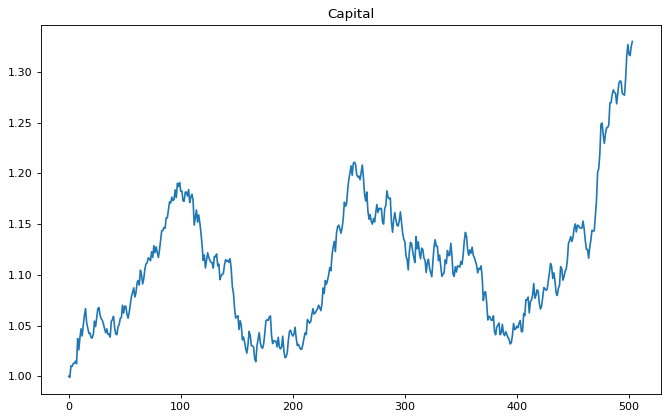

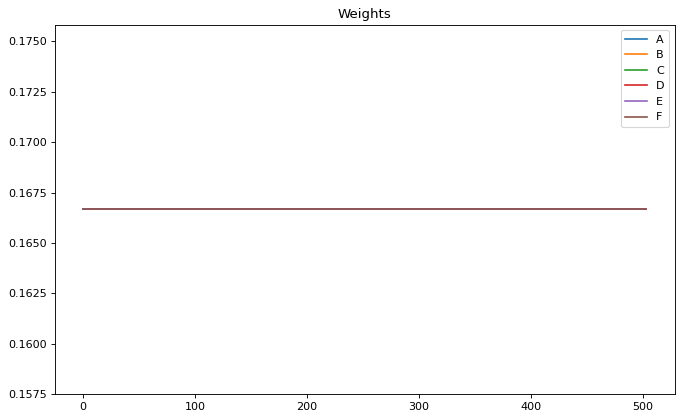

In [93]:
# run simulation
sharpe, capital, weights = grading(train, test)
print(sharpe)

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Capital")
plt.plot(np.arange(len(test)), capital)
plt.show()

plt.figure(figsize=(10, 6), dpi=80)
plt.title("Weights")
plt.plot(np.arange(len(test)), weights)
plt.legend(test.columns)
plt.show()